In [343]:
import pandas as pd
import matplotlib.pyplot as mat
import numpy 
import seaborn as sea
%matplotlib inline
import statsmodels.api as sm
dataset=pd.read_csv('data_scientist_salary_2021.csv')

In [344]:
dataset.columns

Index(['index', 'Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'Avg Salary(K)', 'company_txt', 'Job Location', 'Age', 'Python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

Cleaning Step 1: Parse columns so that only the 25 which will be used in the analysis are present

In [345]:
dataset=dataset[['job_title_sim','company_txt','Rating','Headquarters','Location','Type of ownership','Industry','Sector','Founded','Age','Revenue','Lower Salary', 'Upper Salary','Avg Salary(K)','Size','Hourly','Python','spark','excel', 'sql','sas','tableau','pytorch','google_an']]

In [346]:
dataset.columns

Index(['job_title_sim', 'company_txt', 'Rating', 'Headquarters', 'Location',
       'Type of ownership', 'Industry', 'Sector', 'Founded', 'Age', 'Revenue',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Size', 'Hourly',
       'Python', 'spark', 'excel', 'sql', 'sas', 'tableau', 'pytorch',
       'google_an'],
      dtype='object')

In [347]:
dataset['Revenue'].groupby(dataset['Revenue']).count()

Revenue
$1 to $2 billion (USD)               60
$1 to $5 million (USD)                8
$10 to $25 million (USD)             32
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$2 to $5 billion (USD)               39
$25 to $50 million (USD)             40
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$50 to $100 million (USD)            46
$500 million to $1 billion (USD)     57
Less than $1 million (USD)            4
Unknown / Non-Applicable            204
Name: Revenue, dtype: int64

In [348]:
dataset['Size'].groupby(dataset['Size']).count()

Size
1 - 50            31
10000+           130
1001 - 5000      150
201 - 500        117
5001 - 10000      76
501 - 1000       134
51 - 200          94
unknown           10
Name: Size, dtype: int64

In [349]:
dataset['Age'].groupby(dataset['Age']).count()

Age
-1      50
 2       2
 4      12
 5       5
 6      16
        ..
 175     2
 191     4
 209     1
 240    14
 277     1
Name: Age, Length: 102, dtype: int64

In [350]:
dataset['Rating'].groupby(dataset['Rating']).count()

Rating
-1.0    11
 1.9     3
 2.1     5
 2.2     2
 2.3     2
 2.4     7
 2.5     2
 2.6    12
 2.7    14
 2.8     7
 2.9    18
 3.0    17
 3.1    25
 3.2    35
 3.3    39
 3.4    44
 3.5    49
 3.6    46
 3.7    61
 3.8    61
 3.9    63
 4.0    47
 4.1    19
 4.2    26
 4.3    32
 4.4    33
 4.5     7
 4.6    10
 4.7    31
 4.8     9
 5.0     5
Name: Rating, dtype: int64

In [351]:
dataset['Founded'].groupby(dataset['Founded']).count()

Founded
-1       50
 1744     1
 1781    14
 1812     1
 1830     4
         ..
 2014    13
 2015    16
 2016     5
 2017    12
 2019     2
Name: Founded, Length: 102, dtype: int64

In [352]:
dataset

,job_title_sim,company_txt,Rating,Headquarters,Location,Type of ownership,Industry,Sector,Founded,Age,...,Size,Hourly,Python,spark,excel,sql,sas,tableau,pytorch,google_an
0,data scientist,Tecolote Research,3.8,"Goleta, CA","Albuquerque, NM",Company - Private,Aerospace & Defense,Aerospace & Defense,1973,48,...,501 - 1000,0,1,0,1,0,1,1,0,0
1,data scientist,University of Maryland Medical System,3.4,"Baltimore, MD","Linthicum, MD",Other Organization,Health Care Services & Hospitals,Health Care,1984,37,...,10000+,0,1,0,0,0,0,0,0,0
2,data scientist,KnowBe4,4.8,"Clearwater, FL","Clearwater, FL",Company - Private,Security Services,Business Services,2010,11,...,501 - 1000,0,1,1,1,1,1,0,0,0
3,data scientist,PNNL,3.8,"Richland, WA","Richland, WA",Government,Energy,"Oil, Gas, Energy & Utilities",1965,56,...,1001 - 5000,0,1,0,0,0,0,0,0,0
4,data scientist,Affinity Solutions,2.9,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,1998,23,...,51 - 200,0,1,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,other scientist,GSK,3.9,"Brentford, United Kingdom","Cambridge, MA",Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1830,191,...,10000+,0,0,0,0,0,0,0,0,0
738,data engineer,Eventbrite,4.4,"San Francisco, CA","Nashville, TN",Company - Public,Internet,Information Technology,2006,15,...,1001 - 5000,0,1,1,0,1,0,0,0,0
739,other scientist,Software Engineering Institute,2.6,"Pittsburgh, PA","Pittsburgh, PA",College / University,Colleges & Universities,Education,1984,37,...,501 - 1000,0,0,0,1,0,0,0,0,0
740,data scientist,"Numeric, LLC",3.2,"Chadds Ford, PA","Allentown, PA",Company - Private,Staffing & Outsourcing,Business Services,-1,-1,...,1 - 50,0,0,0,1,0,0,0,0,0


Cleaning Step 2:Company Size

In [353]:
def upper_size(ranges):
    ten='0123456789'
    index=0
    for numbers in ranges:
        if numbers not in ten:
            return ranges[:index]
        else:
            index+=1
dataset['Size']=list(map(lambda x:upper_size(x),dataset['Size']))

In [354]:
dataset['Size']=pd.to_numeric(dataset['Size'])

In [355]:
dataset['Size']

0        501.0
1      10000.0
2        501.0
3       1001.0
4         51.0
        ...   
737    10000.0
738     1001.0
739      501.0
740        1.0
741      501.0
Name: Size, Length: 742, dtype: float64

Cleaning Step 3:Adding difference in expencted pay. By taking the range of the upper and lower expected salaries, a general spread for each individual job can be gained and compared to other jobs of the same name.

In [356]:
dataset['Salary Spread']=dataset['Upper Salary']-dataset['Lower Salary']
dataset=dataset[['job_title_sim','company_txt','Rating','Headquarters','Location','Type of ownership','Industry','Sector','Founded','Age','Revenue','Lower Salary', 'Upper Salary','Avg Salary(K)','Salary Spread','Size','Hourly','Python','spark','excel', 'sql','sas','tableau','pytorch','google_an']]

Cleaning Step 4:Revenue

In [357]:
dataset['Revenue'].groupby(dataset['Revenue']).count()

Revenue
$1 to $2 billion (USD)               60
$1 to $5 million (USD)                8
$10 to $25 million (USD)             32
$10+ billion (USD)                  124
$100 to $500 million (USD)           91
$2 to $5 billion (USD)               39
$25 to $50 million (USD)             40
$5 to $10 billion (USD)              19
$5 to $10 million (USD)              18
$50 to $100 million (USD)            46
$500 million to $1 billion (USD)     57
Less than $1 million (USD)            4
Unknown / Non-Applicable            204
Name: Revenue, dtype: int64

In [358]:
def true_earn(revenue):
    return_number=''
    if 'to' in revenue:
        for characters in revenue[revenue[1:].index('$')+2:]:
            if characters==' ':
                return int(return_number)*1000 if 'billion' in revenue[revenue.index('$'):] else int(return_number)
            else:
                return_number+=characters
    elif '+' in revenue:
        return 10000
    elif 'Less' in revenue:
        return 1
    else:
        return 500
dataset['Revenue']=list(map(lambda x:true_earn(x),dataset['Revenue']))

In [359]:
dataset['Revenue']

0        100
1       5000
2        500
3       1000
4        500
       ...  
737    10000
738      500
739      500
740       10
741      100
Name: Revenue, Length: 742, dtype: int64

Cleaning Step 5:Change skill and hourly columns from numerical to boolean

In [360]:
dataset['Hourly']=dataset['Hourly'].astype(bool)
dataset['Python']=dataset['Python'].astype(bool)
dataset['spark']=dataset['spark'].astype(bool)
dataset['excel']=dataset['excel'].astype(bool)
dataset['sql']=dataset['sql'].astype(bool)
dataset['sas']=dataset['sas'].astype(bool)
dataset['tableau']=dataset['tableau'].astype(bool)
dataset['pytorch']=dataset['pytorch'].astype(bool)
dataset['google_an']=dataset['google_an'].astype(bool)
dataset

,job_title_sim,company_txt,Rating,Headquarters,Location,Type of ownership,Industry,Sector,Founded,Age,...,Size,Hourly,Python,spark,excel,sql,sas,tableau,pytorch,google_an
0,data scientist,Tecolote Research,3.8,"Goleta, CA","Albuquerque, NM",Company - Private,Aerospace & Defense,Aerospace & Defense,1973,48,...,501.0,False,True,False,True,False,True,True,False,False
1,data scientist,University of Maryland Medical System,3.4,"Baltimore, MD","Linthicum, MD",Other Organization,Health Care Services & Hospitals,Health Care,1984,37,...,10000.0,False,True,False,False,False,False,False,False,False
2,data scientist,KnowBe4,4.8,"Clearwater, FL","Clearwater, FL",Company - Private,Security Services,Business Services,2010,11,...,501.0,False,True,True,True,True,True,False,False,False
3,data scientist,PNNL,3.8,"Richland, WA","Richland, WA",Government,Energy,"Oil, Gas, Energy & Utilities",1965,56,...,1001.0,False,True,False,False,False,False,False,False,False
4,data scientist,Affinity Solutions,2.9,"New York, NY","New York, NY",Company - Private,Advertising & Marketing,Business Services,1998,23,...,51.0,False,True,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,other scientist,GSK,3.9,"Brentford, United Kingdom","Cambridge, MA",Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1830,191,...,10000.0,False,False,False,False,False,False,False,False,False
738,data engineer,Eventbrite,4.4,"San Francisco, CA","Nashville, TN",Company - Public,Internet,Information Technology,2006,15,...,1001.0,False,True,True,False,True,False,False,False,False
739,other scientist,Software Engineering Institute,2.6,"Pittsburgh, PA","Pittsburgh, PA",College / University,Colleges & Universities,Education,1984,37,...,501.0,False,False,False,True,False,False,False,False,False
740,data scientist,"Numeric, LLC",3.2,"Chadds Ford, PA","Allentown, PA",Company - Private,Staffing & Outsourcing,Business Services,-1,-1,...,1.0,False,False,False,True,False,False,False,False,False


Cleaning Step 6: cleaning negative year and age values

In [361]:
dataset.dtypes
dataset.Age.mean()

47.52425876010782

In [362]:
def nullify_negatives(number,mean):
    if number==-1:
        return int(mean)
    else:
        return int(number)

dataset['Age']=list(map(lambda x:nullify_negatives(x,dataset['Age'].mean()),dataset['Age']))
dataset['Rating']=list(map(lambda x:nullify_negatives(x,dataset['Rating'].mean()),dataset['Rating']))

In [363]:
def nullify_negatives(number,mean):
    if number==-1:
        return 'N/A'
    else:
        return int(number)

dataset['Founded']=list(map(lambda x:nullify_negatives(x,dataset['Founded'].mean()),dataset['Founded']))

Cleaning Step 7: Removing city names from job location

In [364]:
def strip_city(name):
    i=-1
    for letters in name[::-1]:
        if letters==',':
            return name[i+2:]
        else:
            i-=1
            
dataset['Location']=list(map(lambda x:strip_city(x),dataset['Location']))

In [365]:
dataset['Location'].groupby(dataset['Location']).count()

Location
AL      8
AZ      9
CA    152
CO     11
CT      5
DC     11
DE      6
FL     16
GA      6
IA      5
ID      2
IL     40
IN     10
KS      3
KY      6
LA      4
MA    103
MD     35
MI      6
MN      2
MO      9
NC     21
NE      4
NJ     17
NM      3
NY     72
OH     14
OR      4
PA     33
RI      1
SC      1
TN     13
TX     28
UT     10
VA     41
WA     21
WI     10
Name: Location, dtype: int64

Cleaning Step 8: Changing names of columns and noting units of measure

In [366]:
dataset.columns

Index(['job_title_sim', 'company_txt', 'Rating', 'Headquarters', 'Location',
       'Type of ownership', 'Industry', 'Sector', 'Founded', 'Age', 'Revenue',
       'Lower Salary', 'Upper Salary', 'Avg Salary(K)', 'Salary Spread',
       'Size', 'Hourly', 'Python', 'spark', 'excel', 'sql', 'sas', 'tableau',
       'pytorch', 'google_an'],
      dtype='object')

In [367]:
updated_column_names=['Job_Title','Company_Name','Company_Rating','Location_of_Headquarters','Location_of_Job','Form_of_Ownership','Company_Industry_type','Job_Sector','Year_Founded','Age_Of_Company','Company_Revenue(Million $)','Lower_Salary(Thousand $)','Upper_Salary(Thousand $)','Avg_Salary(Thousand $)','Spread_of_Salary','Company_Size','Hourly_Wage','Python_Experience','Spark_Experience','Excel_Experience','Sql_Experience','Sas_Experience','Tableau_Experience','Pytorch_Experience','Google_Analytics_Certificate']
dataset.columns=updated_column_names
dataset

,Job_Title,Company_Name,Company_Rating,Location_of_Headquarters,Location_of_Job,Form_of_Ownership,Company_Industry_type,Job_Sector,Year_Founded,Age_Of_Company,...,Company_Size,Hourly_Wage,Python_Experience,Spark_Experience,Excel_Experience,Sql_Experience,Sas_Experience,Tableau_Experience,Pytorch_Experience,Google_Analytics_Certificate
0,data scientist,Tecolote Research,3,"Goleta, CA",NM,Company - Private,Aerospace & Defense,Aerospace & Defense,1973,48,...,501.0,False,True,False,True,False,True,True,False,False
1,data scientist,University of Maryland Medical System,3,"Baltimore, MD",MD,Other Organization,Health Care Services & Hospitals,Health Care,1984,37,...,10000.0,False,True,False,False,False,False,False,False,False
2,data scientist,KnowBe4,4,"Clearwater, FL",FL,Company - Private,Security Services,Business Services,2010,11,...,501.0,False,True,True,True,True,True,False,False,False
3,data scientist,PNNL,3,"Richland, WA",WA,Government,Energy,"Oil, Gas, Energy & Utilities",1965,56,...,1001.0,False,True,False,False,False,False,False,False,False
4,data scientist,Affinity Solutions,2,"New York, NY",NY,Company - Private,Advertising & Marketing,Business Services,1998,23,...,51.0,False,True,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,other scientist,GSK,3,"Brentford, United Kingdom",MA,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,1830,191,...,10000.0,False,False,False,False,False,False,False,False,False
738,data engineer,Eventbrite,4,"San Francisco, CA",TN,Company - Public,Internet,Information Technology,2006,15,...,1001.0,False,True,True,False,True,False,False,False,False
739,other scientist,Software Engineering Institute,2,"Pittsburgh, PA",PA,College / University,Colleges & Universities,Education,1984,37,...,501.0,False,False,False,True,False,False,False,False,False
740,data scientist,"Numeric, LLC",3,"Chadds Ford, PA",PA,Company - Private,Staffing & Outsourcing,Business Services,N/A,47,...,1.0,False,False,False,True,False,False,False,False,False


In [368]:
dataset.query("Year_Founded!='N/A'")['Year_Founded'].describe()

count      692
unique     101
top       2010
freq        32
Name: Year_Founded, dtype: int64

In [414]:
dataset['Form_of_Ownership'].describe()

count                   742
unique                    9
top       Company - Private
freq                    410
Name: Form_of_Ownership, dtype: object

Company_Rating
1      3
2     69
3    451
4    214
5      5
Name: Company_Rating, dtype: int64

In [370]:
dataset.dtypes

Job_Title                        object
Company_Name                     object
Company_Rating                    int64
Location_of_Headquarters         object
Location_of_Job                  object
Form_of_Ownership                object
Company_Industry_type            object
Job_Sector                       object
Year_Founded                     object
Age_Of_Company                    int64
Company_Revenue(Million $)        int64
Lower_Salary(Thousand $)          int64
Upper_Salary(Thousand $)          int64
Avg_Salary(Thousand $)          float64
Spread_of_Salary                  int64
Company_Size                    float64
Hourly_Wage                        bool
Python_Experience                  bool
Spark_Experience                   bool
Excel_Experience                   bool
Sql_Experience                     bool
Sas_Experience                     bool
Tableau_Experience                 bool
Pytorch_Experience                 bool
Google_Analytics_Certificate       bool


In order to make the correct correlation matrix, we need to remove the skill based columns and hourly wage, only useing the truly continuous variables.

In [371]:
correlation=dataset[['Company_Rating','Age_Of_Company','Company_Revenue(Million $)','Lower_Salary(Thousand $)','Upper_Salary(Thousand $)','Avg_Salary(Thousand $)','Spread_of_Salary','Company_Size']]

In [372]:
correlation.corr()

,Company_Rating,Age_Of_Company,Company_Revenue(Million $),Lower_Salary(Thousand $),Upper_Salary(Thousand $),Avg_Salary(Thousand $),Spread_of_Salary,Company_Size
Company_Rating,1.000000,-0.098330,-0.115469,0.153521,0.099320,0.123165,-0.013990,-0.078484
Age_Of_Company,-0.098330,1.000000,0.627074,0.010646,0.033199,0.024380,0.060866,0.515518
Company_Revenue(Million $),-0.115469,0.627074,1.000000,0.120304,0.141950,0.135115,0.139722,0.803035
Lower_Salary(Thousand $),0.153521,0.010646,0.120304,1.000000,0.939995,0.978679,0.597556,0.114134
Upper_Salary(Thousand $),0.099320,0.033199,0.141950,0.939995,1.000000,0.990032,0.835274,0.121250
Avg_Salary(Thousand $),0.123165,0.024380,0.135115,0.978679,0.990032,1.000000,0.749507,0.119923
Spread_of_Salary,-0.013990,0.060866,0.139722,0.597556,0.835274,0.749507,1.000000,0.104682
Company_Size,-0.078484,0.515518,0.803035,0.114134,0.121250,0.119923,0.104682,1.000000


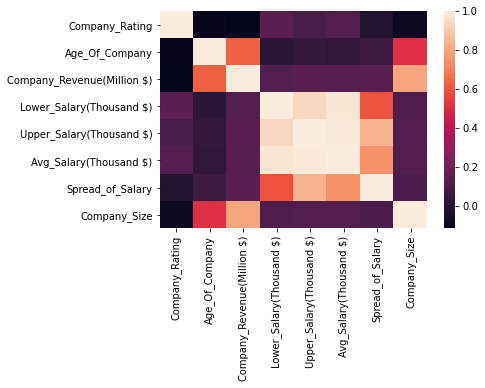

In [428]:
sea.heatmap(correlation.corr())
mat.savefig('correlation.png')

Visualization Portion

In [373]:
#Python experience(percent)- job title(Bar chart)
jobs=dataset.query("Python_Experience==True")
jobs=jobs['Python_Experience'].groupby(jobs['Job_Title']).count()*100
jobs['director']=0
jobs/=dataset['Job_Title'].groupby(dataset['Job_Title']).count()
jobs=jobs.drop('na')
jobs

Job_Title
Data scientist project manager    25.000000
analyst                           30.693069
data analitics                    62.500000
data engineer                     64.705882
data modeler                      40.000000
data scientist                    76.677316
machine learning engineer         81.818182
other scientist                    7.692308
director                           0.000000
Name: Python_Experience, dtype: float64

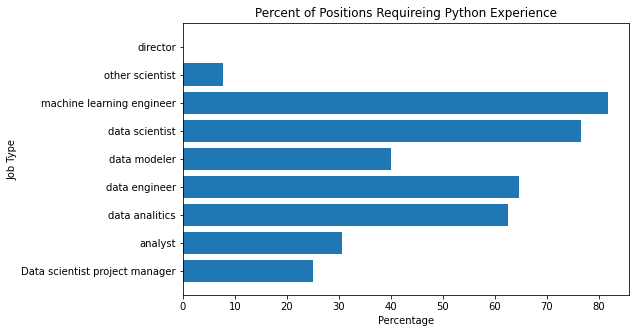

In [407]:
figure,axis=mat.subplots(figsize=(8,5))
bars=jobs.index
Python_Percentage_Graph=axis.barh(numpy.arange(len(bars)),list(jobs),tick_label=bars)
title=axis.set_title('Percent of Positions Requireing Python Experience')
y_label=axis.set_ylabel('Job Type')
x_label=axis.set_xlabel('Percentage')

mat.savefig('Python_Experience.png')

In [375]:
#Job title-avg salary with spread of salary as error bar(Bar Chart)
job_pay=dataset['Avg_Salary(Thousand $)'].groupby(dataset['Job_Title']).mean()
job_pay=job_pay.drop('na')
pay_error=dataset['Spread_of_Salary'].groupby(dataset['Job_Title']).mean()/2
pay_error=pay_error.drop('na')
pay_error

Job_Title
Data scientist project manager    23.031250
analyst                           19.024752
data analitics                    13.500000
data engineer                     29.252101
data modeler                      21.100000
data scientist                    28.185304
director                          36.000000
machine learning engineer         36.068182
other scientist                   26.468531
Name: Spread_of_Salary, dtype: float64

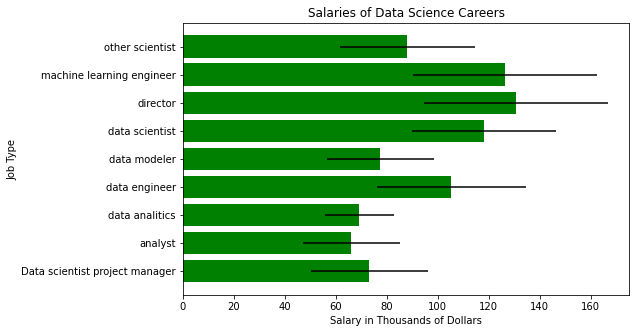

In [408]:
figure,axis=mat.subplots(figsize=(8,5))
bars=job_pay.index
Job_Salary_graph=axis.barh(numpy.arange(len(bars)),list(job_pay),tick_label=bars,color='green',xerr=list(pay_error))
title=axis.set_title('Salaries of Data Science Careers')
y_label=axis.set_ylabel('Job Type')
x_label=axis.set_xlabel('Salary in Thousands of Dollars')
mat.savefig('Job Salary.png')

In [432]:
#Company Rating- Avg salary
rated_salary=dataset["Avg_Salary(Thousand $)"].groupby(dataset['Company_Rating']).mean()
rated_salary_dev=dataset["Avg_Salary(Thousand $)"].groupby(dataset['Company_Rating']).std()
rated_salary_dev

rating=dataset['Company_Rating'].groupby(dataset['Company_Rating']).count()

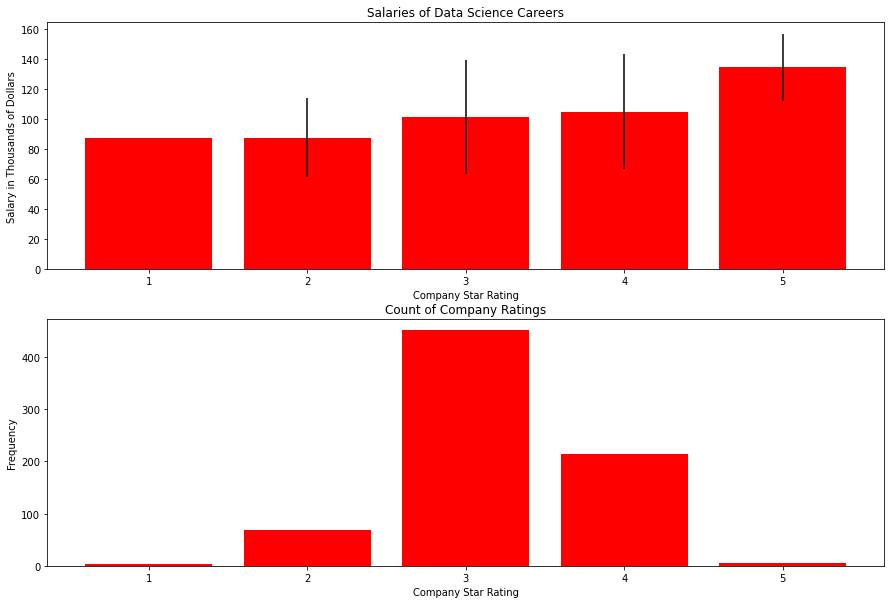

In [436]:
figure,axis=mat.subplots(2,figsize=(15,10))
bars=rated_salary.index
Rated_Salary_graph=axis[0].bar(numpy.arange(len(bars)),list(rated_salary),tick_label=bars,color='red',yerr=rated_salary_dev)
title=axis[0].set_title('Salaries of Data Science Careers')
y_label=axis[0].set_ylabel('Salary in Thousands of Dollars')
x_label=axis[0].set_xlabel('Company Star Rating')

Rated_Salary_graph=axis[1].bar(numpy.arange(len(bars)),list(rating),tick_label=bars,color='red')
title=axis[1].set_title('Count of Company Ratings')
y_label=axis[1].set_ylabel('Frequency')
x_label=axis[1].set_xlabel('Company Star Rating')

mat.savefig('Rating.png')

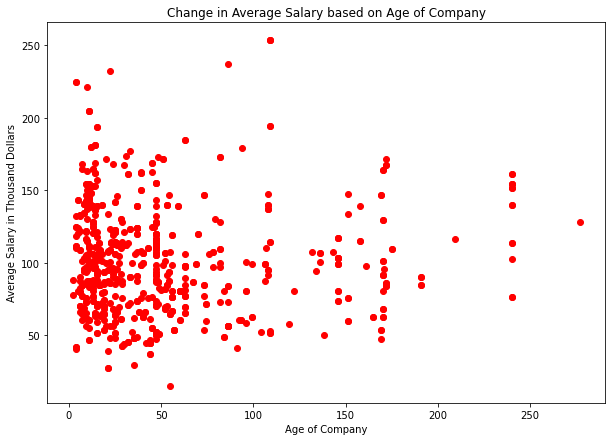

In [411]:
#Age of company- Avg Salary(Scatterplot)
figure,axis=mat.subplots(figsize=(10,7))

Age_Salary_graph=axis.scatter(dataset['Age_Of_Company'],dataset['Avg_Salary(Thousand $)'],color='red')
title=axis.set_title('Change in Average Salary based on Age of Company')
y_label=axis.set_ylabel('Average Salary in Thousand Dollars')
x_label=axis.set_xlabel('Age of Company')
mat.savefig('Age Salary.png')

In [438]:
#Location-company size and salary (Bar Chart)
state_size=dataset['Company_Size'].groupby(dataset['Location_of_Job']).mean()
state_sal=dataset['Avg_Salary(Thousand $)'].groupby(dataset['Location_of_Job']).mean()
state_sal_dev=dataset['Avg_Salary(Thousand $)'].groupby(dataset['Location_of_Job']).std()

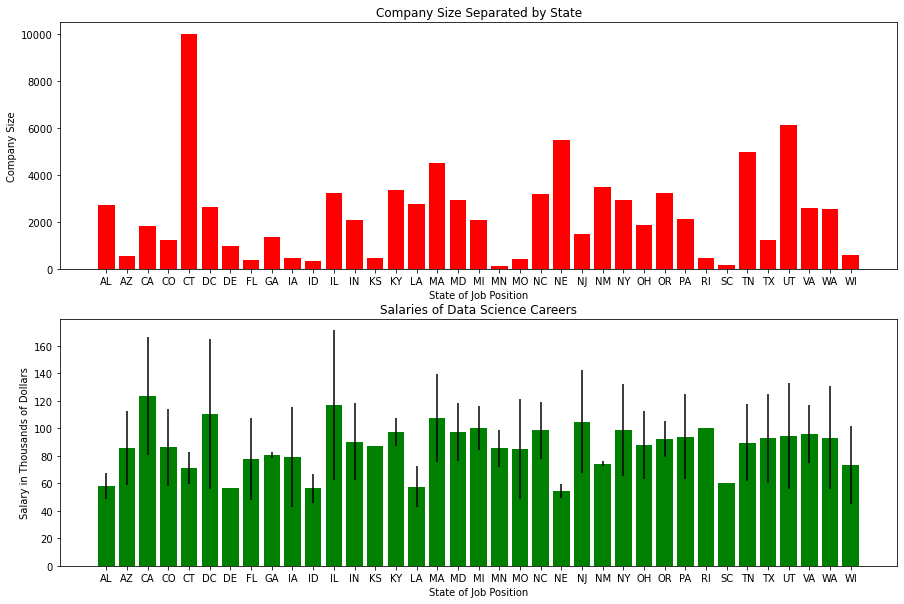

In [439]:
figure,axis=mat.subplots(2,figsize=(15,10))
bars=state_size.index
axis[0].bar(numpy.arange(len(bars)),list(state_size),tick_label=bars,color='red')
title=axis[0].set_title('Company Size Separated by State')
y_label=axis[0].set_ylabel('Company Size')
x_label=axis[0].set_xlabel('State of Job Position')

axis[1].bar(numpy.arange(len(bars)),list(state_sal),tick_label=bars,color='green',yerr=state_sal_dev)
title=axis[1].set_title('Salaries of Data Science Careers')
y_label=axis[1].set_ylabel('Salary in Thousands of Dollars')
x_label=axis[1].set_xlabel('State of Job Position')

mat.savefig('State size and salary.png')

In [ ]:
#Company Revenue (Histogram)

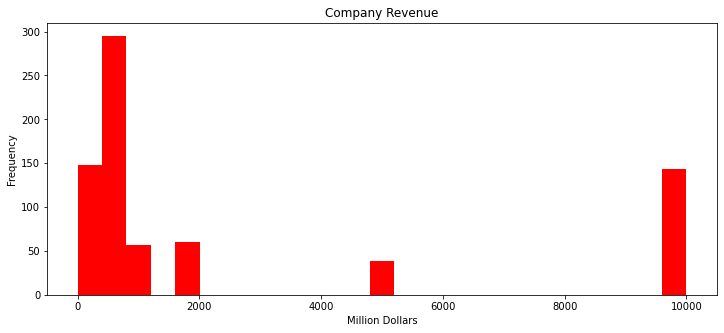

In [426]:
figure,axis=mat.subplots(figsize=(12,5))

Age_Salary_graph=axis.hist(dataset['Company_Revenue(Million $)'],25,color='red')
title=axis.set_title('Company Revenue')
y_label=axis.set_ylabel('Frequency')
x_label=axis.set_xlabel('Million Dollars')
mat.savefig('Age Salary.png')